<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Netflix_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install pycaret-ts-alpha


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/netflix.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


## 1. Close Value of Netflix Stocks

In [34]:
df1 = df[['Date','Close']]
df1.head()

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4856 non-null   object 
 1   Close   4856 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.0+ KB


In [36]:
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series   #pycaret includes time series and related plotting tools

In [37]:
df1.index = pd.DatetimeIndex(df1["Date"])
df1.drop(["Date"],axis=1,inplace=True)   # replace date with the index
df1.head()

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429


In [38]:
df1 = df1.asfreq('d')   # day-wise frequency of the data
df1.index

DatetimeIndex(['2002-05-23', '2002-05-24', '2002-05-25', '2002-05-26',
               '2002-05-27', '2002-05-28', '2002-05-29', '2002-05-30',
               '2002-05-31', '2002-06-01',
               ...
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03'],
              dtype='datetime64[ns]', name='Date', length=7044, freq='D')

In [39]:
df1=df1.fillna(method='ffill')  # we apply forward fill for time series data
df1.head()

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-25,1.210000
2002-05-26,1.210000
2002-05-27,1.210000


In [40]:
data=df1.Close   
data

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-25      1.210000
2002-05-26      1.210000
2002-05-27      1.210000
                 ...    
2021-08-30    566.179993
2021-08-31    569.190002
2021-09-01    582.070007
2021-09-02    588.549988
2021-09-03    589.520081
Freq: D, Name: Close, Length: 7044, dtype: float64

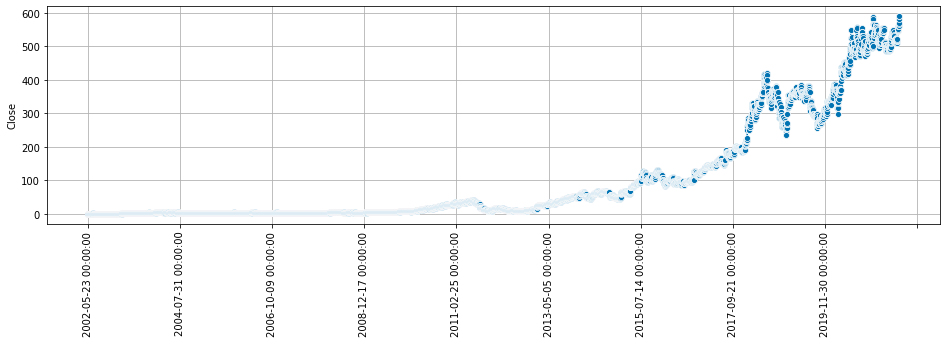

In [41]:
pl=plot_series(data)
plt.xticks(rotation=90)
plt.grid()

In [42]:
exp = TimeSeriesExperiment()
exp.setup(data=data,session_id=42,fh=365)

,Description,Value
0,session_id,42
1,Original Data,"(7044, 1)"
2,Missing Values,False
3,Transformed Train Set,"(6679,)"
4,Transformed Test Set,"(365,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [43]:
model = exp.create_model("arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2017-09-04,92.8573,13750.4568,0.2831,0.3571,-1.4474
1,2018-09-04,40.4565,2817.6045,0.1348,0.1197,-1.1677
2,2019-09-04,81.8853,11251.4573,0.1906,0.2216,-0.8430
Mean,NaN,71.7331,9273.1729,0.2028,0.2328,-1.1527
SD,NaN,22.5649,4677.3940,0.0611,0.0972,0.2469


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [44]:
y_train = exp.get_config("y_train")
y_train[:5]

Date
2002-05-23    1.196429
2002-05-24    1.210000
2002-05-25    1.210000
2002-05-26    1.210000
2002-05-27    1.210000
Freq: D, Name: Close, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,34.4321,40.807,0.0682,0.0651,-1.7227


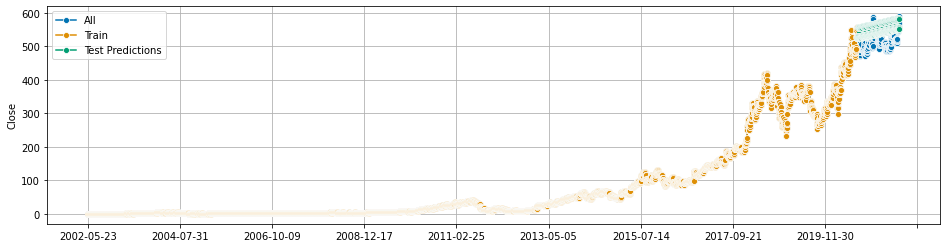

In [45]:
y_predict = exp.predict_model(model)
plot_series(data, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

In [46]:
tuned_model = exp.tune_model(model)
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2017-09-04,98.3421,14839.8016,0.3039,0.3853,-1.6413
1,2018-09-04,40.7548,2849.0392,0.1357,0.1205,-1.1919
2,2019-09-04,82.6572,11443.8804,0.1924,0.2241,-0.8745
Mean,NaN,73.9180,9710.9071,0.2107,0.2433,-1.2359
SD,NaN,24.3085,5046.2523,0.0699,0.1090,0.3145


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 0, 14),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [47]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,28.4813,33.3711,0.0565,0.0545,-0.8209


2020-09-04    527.8955
2020-09-05    527.9777
2020-09-06    528.0599
2020-09-07    528.2857
2020-09-08    528.2952
                ...   
2021-08-30    554.9593
2021-08-31    555.0382
2021-09-01    555.1172
2021-09-02    555.1961
2021-09-03    555.2751
Freq: D, Length: 365, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,28.4813,33.3711,0.0565,0.0545,-0.8209


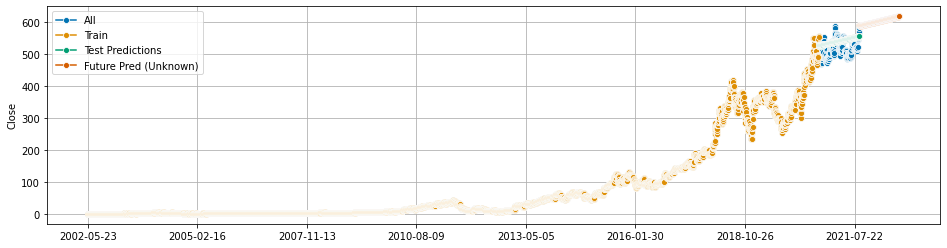

In [49]:
y_pred = exp.predict_model(tuned_model)

# Finalize Model
final_model = exp.finalize_model(tuned_model)

# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
_ = plot_series(data, y_train, y_pred, y_pred_future, labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])
plt.grid()

## Open Values of Netflix Stocks

In [50]:
df2 = df[['Date','Open']]
df2.head()

,Date,Open
0,2002-05-23,1.156429
1,2002-05-24,1.214286
2,2002-05-28,1.213571
3,2002-05-29,1.164286
4,2002-05-30,1.107857


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4856 non-null   object 
 1   Open    4856 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.0+ KB


In [52]:
df2.index = pd.DatetimeIndex(df2["Date"])
df2.drop(["Date"],axis=1,inplace=True)   # replace date with the index
df2.head()

,Open
Date,
2002-05-23,1.156429
2002-05-24,1.214286
2002-05-28,1.213571
2002-05-29,1.164286
2002-05-30,1.107857


In [53]:
df2 = df2.asfreq('d')   # day-wise frequency of the data
df2.index

DatetimeIndex(['2002-05-23', '2002-05-24', '2002-05-25', '2002-05-26',
               '2002-05-27', '2002-05-28', '2002-05-29', '2002-05-30',
               '2002-05-31', '2002-06-01',
               ...
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03'],
              dtype='datetime64[ns]', name='Date', length=7044, freq='D')

In [56]:
df2=df2.fillna(method='ffill')  # we apply forward fill for time series data
df2.head()

,Open
Date,
2002-05-23,1.156429
2002-05-24,1.214286
2002-05-25,1.214286
2002-05-26,1.214286
2002-05-27,1.214286


In [57]:
data1=df2.Open 
data1

Date
2002-05-23      1.156429
2002-05-24      1.214286
2002-05-25      1.214286
2002-05-26      1.214286
2002-05-27      1.214286
                 ...    
2021-08-30    557.250000
2021-08-31    566.119995
2021-09-01    569.000000
2021-09-02    583.679993
2021-09-03    585.799988
Freq: D, Name: Open, Length: 7044, dtype: float64

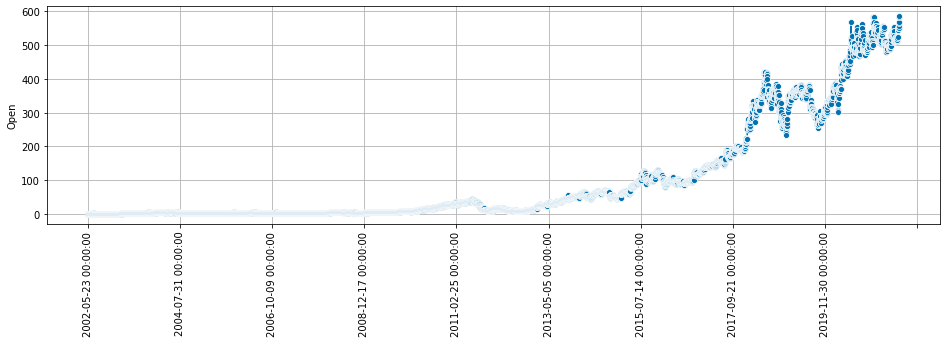

In [58]:
open=plot_series(data1)
plt.xticks(rotation=90)
plt.grid()

In [63]:
exp = TimeSeriesExperiment()
exp.setup(data=data1,session_id=42,fh=365)

,Description,Value
0,session_id,42
1,Original Data,"(7044, 1)"
2,Missing Values,False
3,Transformed Train Set,"(6679,)"
4,Transformed Test Set,"(365,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [64]:
model = exp.create_model("arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2017-09-04,92.8828,13802.4129,0.2831,0.3573,-1.4385
1,2018-09-04,44.5433,3177.0334,0.1465,0.1300,-1.4911
2,2019-09-04,78.9054,10497.3618,0.1842,0.2126,-0.7283
Mean,NaN,72.1105,9158.9360,0.2046,0.2333,-1.2193
SD,NaN,20.3110,4439.8356,0.0576,0.0940,0.3479


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [65]:
y_train = exp.get_config("y_train")
y_train[:5]

Date
2002-05-23    1.156429
2002-05-24    1.214286
2002-05-25    1.214286
2002-05-26    1.214286
2002-05-27    1.214286
Freq: D, Name: Open, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,39.6341,45.4377,0.0785,0.0746,-2.3974


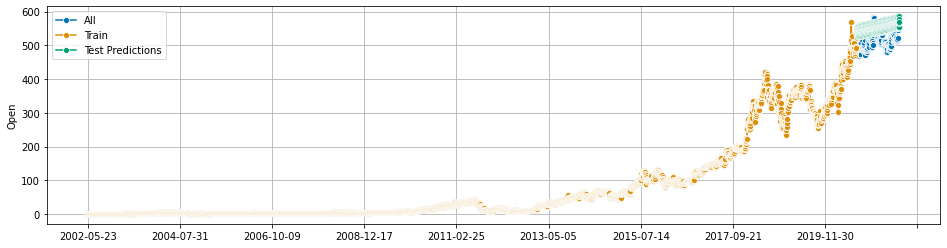

In [66]:
y_predict = exp.predict_model(model)
plot_series(data1, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

In [67]:
tuned_model = exp.tune_model(model)
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2017-09-04,134.4969,23203.9657,0.4634,0.3652,-3.0995
1,2018-09-04,32.9113,2135.9365,0.1107,0.0991,-0.6748
2,2019-09-04,55.6068,5353.9851,0.1311,0.1435,0.1185
Mean,NaN,74.3383,10231.2958,0.2351,0.2026,-1.2186
SD,NaN,43.5359,9266.6637,0.1617,0.1164,1.3689


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

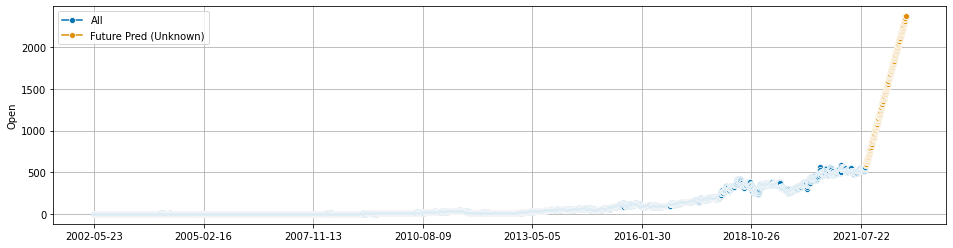

In [68]:
# Finalize Model
final_model = exp.finalize_model(tuned_model)
# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)
_=plot_series(data1, y_pred_future, labels=['All', 'Future Pred (Unknown)'])
plt.grid()

In [69]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,351.782,396.865,0.6788,0.4802,-258.1816


2020-09-04     544.5239
2020-09-05     544.5520
2020-09-06     544.5521
2020-09-07     533.7121
2020-09-08     545.1521
                ...    
2021-08-30    1173.8695
2021-08-31    1185.3095
2021-09-01    1206.4896
2021-09-02    1197.7095
2021-09-03    1197.2335
Freq: D, Length: 365, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,351.782,396.865,0.6788,0.4802,-258.1816


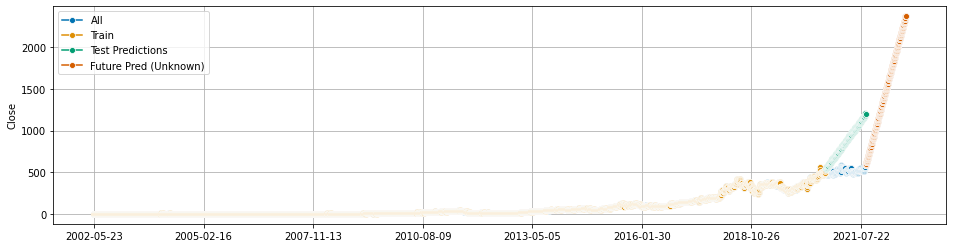

In [71]:
y_pred = exp.predict_model(tuned_model)

# Finalize Model
final_model = exp.finalize_model(tuned_model)

# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
_ = plot_series(data, y_train, y_pred, y_pred_future, labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])
plt.grid()